In [68]:
import torch
import torch.nn as nn
class Autoencoder(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(5000,1000),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(1000,5000)
        )
    def forward(self,x):
        code = self.encoder(x)
        return self.decoder(code)
device = 'cuda'
model = Autoencoder().to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

In [69]:
from lib.utils import load_raw_by_path
raw = load_raw_by_path(f'../data/full/1_raw_edf/22-AGING-1.edf')
eeg,t = raw.get_data(picks='EEG',start=0,stop=None,return_times=True)
eeg = eeg.reshape(-1,5000)
eeg = torch.from_numpy(eeg).float()

In [70]:
from torch.utils.data import DataLoader,TensorDataset

In [71]:
trainloader = DataLoader(TensorDataset(eeg),batch_size=64,shuffle=True)

In [93]:
from tqdm import tqdm
loss_tr = []
pbar = tqdm(range(1000))

for epoch in pbar:
    # train loop
    model.train()
    loss_tr_total = 0
    for X_tr in trainloader:
        X_tr = X_tr[0].to(device)
        logits = model(X_tr)
        loss = criterion(logits,X_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_tr_total += loss.item()
    loss_tr.append(loss_tr_total/len(trainloader))
plt.plot(loss_tr)


 10%|█         | 100/1000 [03:16<29:30,  1.97s/it]


KeyboardInterrupt: 

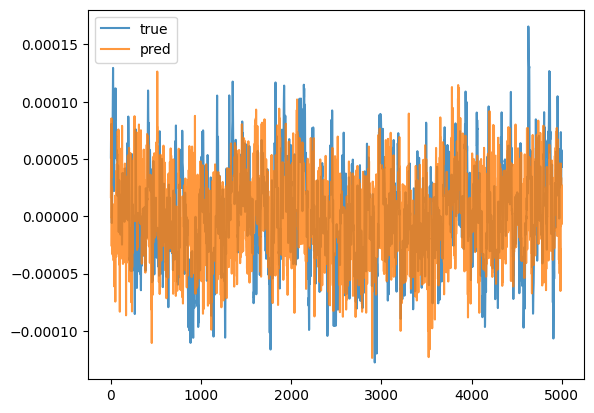

In [103]:
i = 15
plt.plot(eeg[i],alpha=.8,label='true')
plt.plot(model(eeg[i].cuda()).detach().cpu(),alpha=.8,label='pred')
plt.legend()

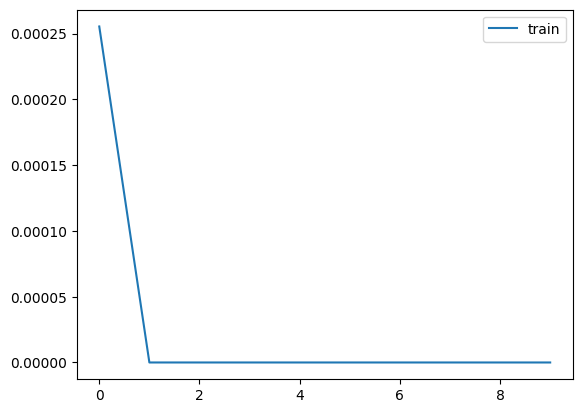

In [42]:
import matplotlib.pyplot as plt
plt.plot(loss_tr,label='train')
plt.legend()